In [1]:
# Third party libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

# User created files
import f_helpers

In [2]:
%reload_ext autoreload
%autoreload 2

## Most Important Cities Notebook

The purpose of this notebook is to determine which city or cities are the most important. While it is important to ask which city has the highest sale amount, other factors need to be considered, such as order frequency, average order amount, diversity of items ordered, etc. Visualizations and an analysis of the data follow.

### Step 1: Obtain the Data

We will obtain and clean the data from the SQL queries that were used to gather the data into the desired form. The SQL queries that were used can be found in `queries/most_important_cities`. To see how the Pandas DataFrames were created from the queries, please view the `f_helpers.py` file.

In [3]:
df_dict = f_helpers.table_to_df()

In [4]:
print (df_dict.keys())

dict_keys(['city_unique_items', 'city_subcategory_sale_counts', 'city_sales_dates', 'city_unique_product_subcategories', 'sales_info_city'])


In [5]:
# Short for city_sales_dates
csd_df = df_dict['city_sales_dates'].copy()

# Short for city_unique_items
cui_df = df_dict['city_unique_items'].copy()

# Short for city_subcategory_sale_counts
cssc_df = df_dict['city_subcategory_sale_counts'].copy()

# Short for city_unique_product_subcategories
cups_df = df_dict['city_unique_product_subcategories'].copy()

# Short for sales_info_city
sic_df = df_dict['sales_info_city'].copy()

In [6]:
csd_df = csd_df.rename(columns = {
    0: 'city',
    1: 'subtotal',
    2: 'year',
    3: 'month',
    4: 'day'
})

In [7]:
cui_df = cui_df.rename(columns = { 0: 'city', 1: 'unique_items_purchased' })

In [8]:
cssc_df = cssc_df.rename(columns = { 
    0: 'city', 
    1: 'product_id', 
    2: 'product_subcategory_id', 
    3: 'count', 
    4: 'standard_cost', 
    5: 'list_price' 
})

In [9]:
cups_df = cups_df.rename(columns = { 0: 'city', 1: 'unique_subcategories' })

In [10]:
sic_df = sic_df.rename(columns = { 0: 'city', 1: 'orders_total', 2: 'sum_total', 3: 'avg_sale_amount' })

### Step 2: Visualizing the Data

Now, we will begin an analysis of the data.

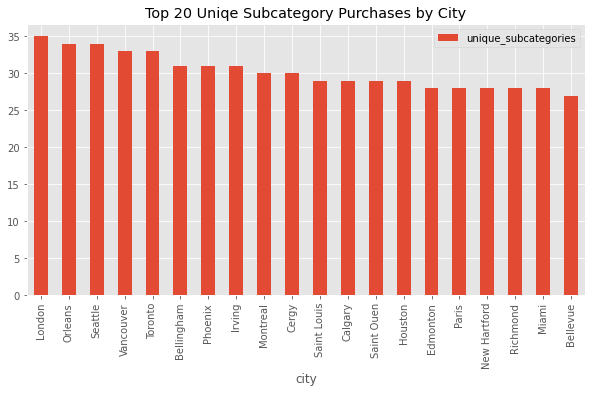

In [11]:
cups_df.head(20).set_index('city').plot(
    kind = 'bar', 
    figsize = (10, 5),
)
plt.title('Top 20 Uniqe Subcategory Purchases by City')
plt.show()

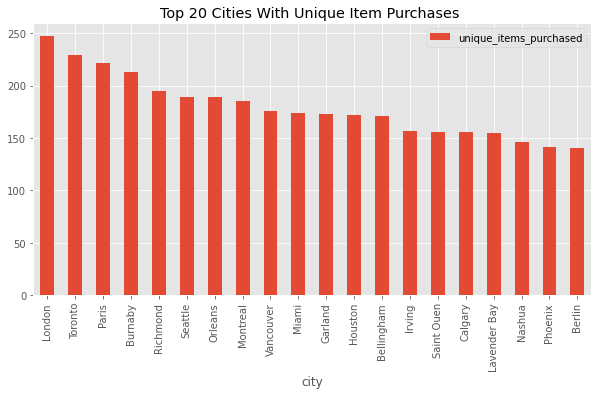

In [12]:
cui_df.head(20).set_index('city').plot(
    kind = 'bar', 
    figsize = (10, 5),
)
plt.title('Top 20 Cities With Unique Item Purchases ')
plt.show()

<AxesSubplot:title={'center':'Top 20 Sales Amounts in USD per City'}, xlabel='sum_total', ylabel='city'>

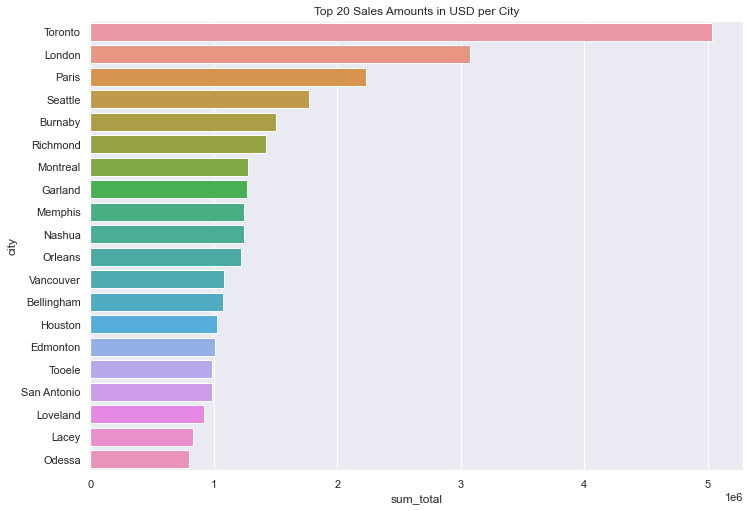

In [13]:
sns.set(rc = { 'figure.figsize':(11.7,8.27) }) # Sets figure size.

plt.title('Top 20 Sales Amounts in USD per City')

sns.barplot(
    data = sic_df.head(20),
    x = 'sum_total',
    y = 'city',
    orient = 'h'
)

<AxesSubplot:title={'center':'Top 20 Average Sales Amounts per City'}, xlabel='avg_sale_amount', ylabel='city'>

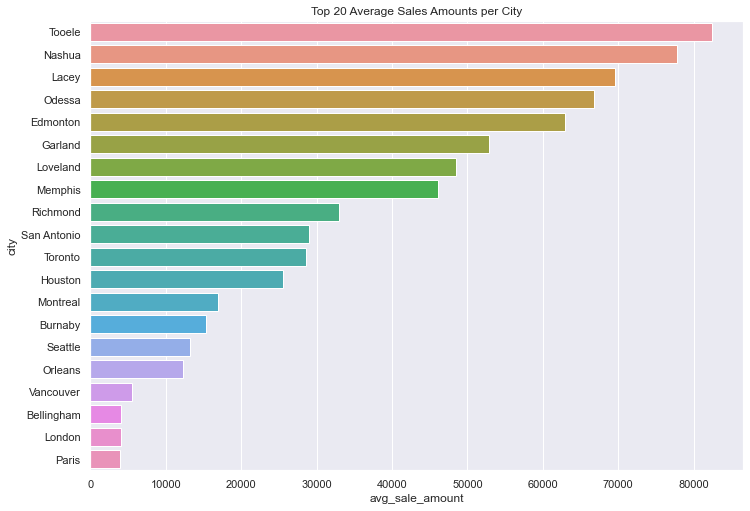

In [14]:
sns.set(rc = { 'figure.figsize':(11.7,8.27) }) # Sets figure size.

plt.title('Top 20 Average Sales Amounts per City')

sns.barplot(
    data = sic_df.head(20).sort_values('avg_sale_amount', ascending = False),
    x = 'avg_sale_amount',
    y = 'city',
    orient = 'h'
)

<AxesSubplot:title={'center':'Top 20 Number of Sales per City'}, xlabel='orders_total', ylabel='city'>

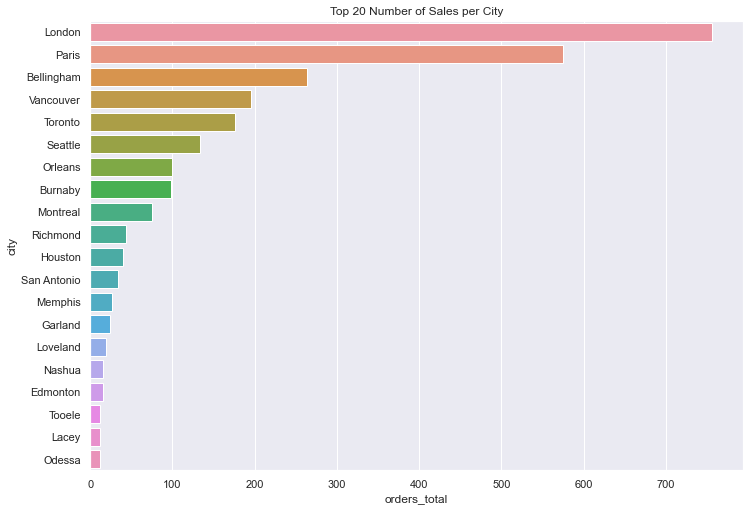

In [15]:
sns.set(rc = { 'figure.figsize':(11.7,8.27) }) # Sets figure size.

plt.title('Top 20 Number of Sales per City')

sns.barplot(
    data = sic_df.head(20).sort_values('orders_total', ascending = False),
    x = 'orders_total',
    y = 'city',
    orient = 'h'
)

In [16]:
sic_df.head(20)

,city,orders_total,sum_total,avg_sale_amount
0,Toronto,176,5034269.59,28603.80
1,London,756,3071176.64,4062.40
2,Paris,575,2233808.20,3884.88
3,Seattle,134,1767307.65,13188.86
4,Burnaby,98,1503463.85,15341.47
5,Richmond,43,1419263.50,33006.13
6,Montreal,75,1274666.84,16995.56
7,Garland,24,1267787.04,52824.46
8,Memphis,27,1246122.20,46152.67
9,Nashua,16,1244107.35,77756.71


### Step 3: Analysis of Individual Cities

Now, we will observe data from individual cities to see if any trends emerge. 

In [17]:
# Need to convert standard_cost and list_price to floats
cssc_df.dtypes

city                      object
product_id                 int64
product_subcategory_id     int64
count                      int64
standard_cost             object
list_price                object
dtype: object

In [18]:
cssc_df['standard_cost'] = cssc_df['standard_cost'].astype(float)
cssc_df['list_price'] = cssc_df['list_price'].astype(float)

In [19]:
# This function is in the notebook because it references a table declared in the notebook.
# Gives the average list_price of the product subcategory alongside the count that the city ordered.

def city_subcat_info(city):
   
    df = pd.merge(
        cssc_df[cssc_df['city'] == city].groupby('product_subcategory_id').sum()['count'],
        cssc_df.groupby('product_subcategory_id').mean()['list_price'],
        how = 'inner',
        on = 'product_subcategory_id'
    )
    
    return df

In [20]:
london_subcat_info_df = city_subcat_info('London')
london_subcat_info_df['percent_of_total'] = (london_subcat_info_df['count'] / london_subcat_info_df['count'].sum())

london_subcat_info_df.sort_values('percent_of_total', ascending = False).head(20)

,count,list_price,percent_of_total
product_subcategory_id,,,
31,1230,34.990000,0.169492
2,1096,1620.044625,0.151027
1,662,1861.521144,0.091222
37,581,18.667801,0.080061
28,533,7.615316,0.073446
21,523,51.837215,0.072068
3,427,1570.341581,0.058840
19,348,8.990000,0.047954
20,242,28.074746,0.033347


In [21]:
toronto_subcat_info_df = city_subcat_info('Toronto')
toronto_subcat_info_df['percent_of_total'] = (toronto_subcat_info_df['count'] / toronto_subcat_info_df['count'].sum())

toronto_subcat_info_df.sort_values('percent_of_total', ascending = False).head(20)

,count,list_price,percent_of_total
product_subcategory_id,,,
2,1659,1620.044625,0.192236
1,960,1861.521144,0.111240
31,880,34.990000,0.101970
21,827,51.837215,0.095829
14,619,644.528264,0.071727
20,410,28.074746,0.047509
12,403,649.589096,0.046698
3,299,1570.341581,0.034647
19,288,8.990000,0.033372


In [22]:
paris_subcat_info_df = city_subcat_info('Paris')
paris_subcat_info_df['percent_of_total'] = (paris_subcat_info_df['count'] / paris_subcat_info_df['count'].sum())

paris_subcat_info_df.sort_values('percent_of_total', ascending = False).head(20)

,count,list_price,percent_of_total
product_subcategory_id,,,
31,905,34.990000,0.168592
2,827,1620.044625,0.154061
1,491,1861.521144,0.091468
37,482,18.667801,0.089791
21,413,51.837215,0.076937
28,385,7.615316,0.071721
19,264,8.990000,0.049180
3,242,1570.341581,0.045082
20,221,28.074746,0.041170


In [23]:
csd_df['subtotal'] = csd_df['subtotal'].astype(float)

In [24]:
csd_df

,city,subtotal,year,month,day
0,Austell,20565.6206,2011.0,5.0,31.0
1,Suwanee,1294.2529,2011.0,5.0,31.0
2,Toronto,32726.4786,2011.0,5.0,31.0
3,Toronto,28832.5289,2011.0,5.0,31.0
4,Trabuco Canyon,419.4589,2011.0,5.0,31.0
...,...,...,...,...,...
31460,Everett,42.2800,2014.0,6.0,30.0
31461,Newton,84.9600,2014.0,6.0,30.0
31462,Oak Bay,74.9800,2014.0,6.0,30.0
31463,Sooke,30.9700,2014.0,6.0,30.0


In [25]:
csd_df[csd_df['city'] == 'Toronto'].groupby(['year', 'month']).sum('subtotal')

subtotal    day
year   month                    
2011.0 5.0     61559.0075   62.0
       7.0     52215.4717    6.0
       8.0    227565.3750   68.0
       10.0   239576.0227  160.0
       12.0    54845.8125    2.0
2012.0 1.0    253803.1830  150.0
       2.0     77137.0801   58.0
       3.0     67913.0128  150.0
       4.0    115972.5740  180.0
       5.0    167586.4876   60.0
       6.0    162106.7163  240.0
       7.0    255220.2835  186.0
       8.0    108480.6674   60.0
       9.0    101556.3595  210.0
       10.0   227700.4119  210.0
       11.0    66017.7454   60.0
       12.0    71764.2314  248.0
2013.0 1.0    161646.7417  140.0
       2.0    122200.6782   56.0
       3.0    107572.8212  210.0
       4.0    200541.4433  180.0
       5.0    138884.7193   60.0
       6.0    138391.5120  210.0
       7.0    196642.9173  186.0
       8.0    104196.5321   60.0
       9.0    130897.9040  240.0
       10.0   181710.7173  180.0
       11.0    60380.3040   60.0
       12.0    92187.2400  217.0
2014.0 1.0    141811.0186  203.0
       3.0    210785.7108  219.0
       5.0    161606.9816    7.0

Text(0.5, 1.0, 'Toronto Total Sales by Month')

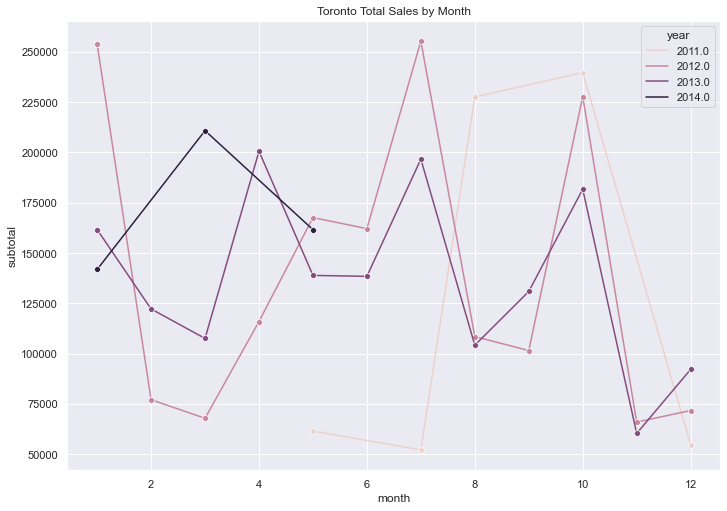

In [26]:
sns.lineplot(
    data = csd_df[csd_df['city'] == 'Toronto'].groupby(['year', 'month']).sum('subtotal'),
    x = 'month',
    y = 'subtotal',
    hue = 'year',
    ci = None,
    marker = 'o'
).set_title("Toronto Total Sales by Month")

Text(0.5, 1.0, 'London Total Sales by Month')

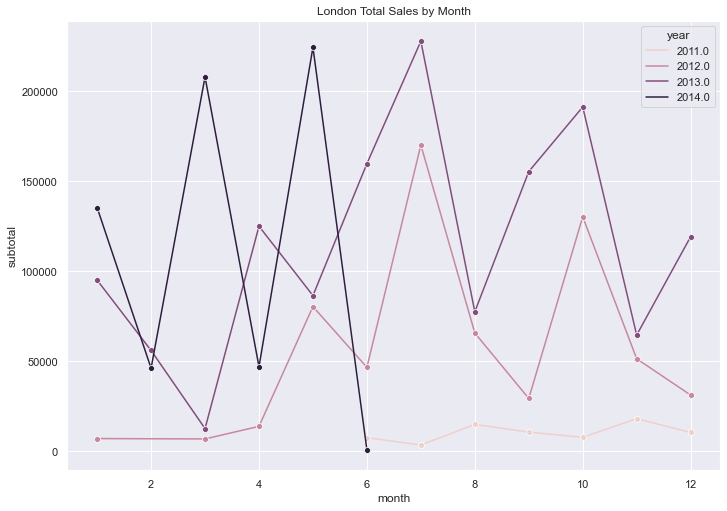

In [27]:
sns.lineplot(
    data = csd_df[csd_df['city'] == 'London'].groupby(['year', 'month']).sum('subtotal'),
    x = 'month',
    y = 'subtotal',
    hue = 'year',
    ci = None,
    marker = 'o'
).set_title("London Total Sales by Month")

Text(0.5, 1.0, 'Paris Total Sales by Month')

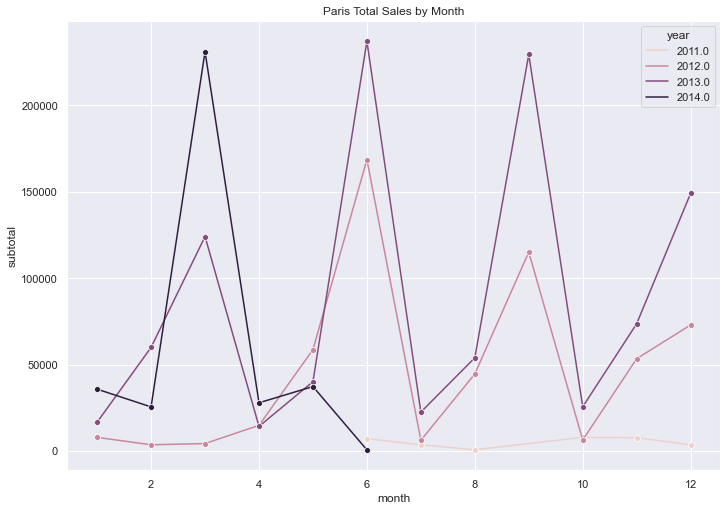

In [28]:
sns.lineplot(
    data = csd_df[csd_df['city'] == 'Paris'].groupby(['year', 'month']).sum('subtotal'),
    x = 'month',
    y = 'subtotal',
    hue = 'year',
    ci = None,
    marker = 'o'
).set_title("Paris Total Sales by Month")

Text(0.5, 1.0, 'Toronto Number of Sales per Month')

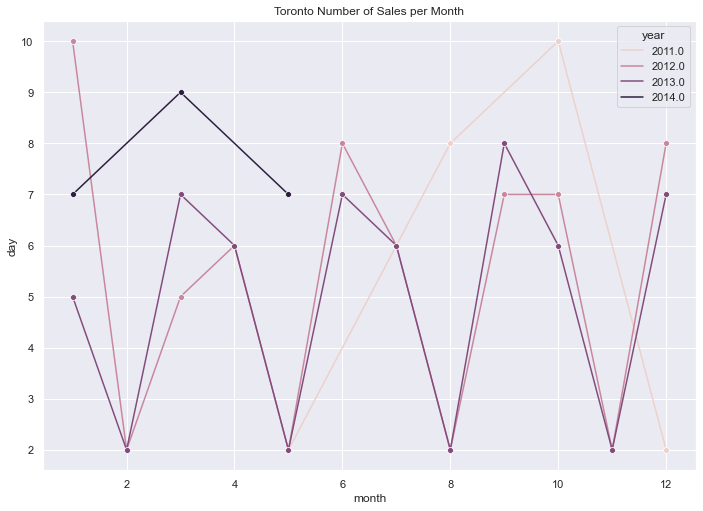

In [29]:
sns.lineplot(
    data = csd_df[csd_df['city'] == 'Toronto'].groupby(['year', 'month']).count(),
    x = 'month',
    y = 'day',
    hue = 'year',
    ci = None,
    marker = 'o'
).set_title('Toronto Number of Sales per Month')

Text(0.5, 1.0, 'London Number of Sales per Month')

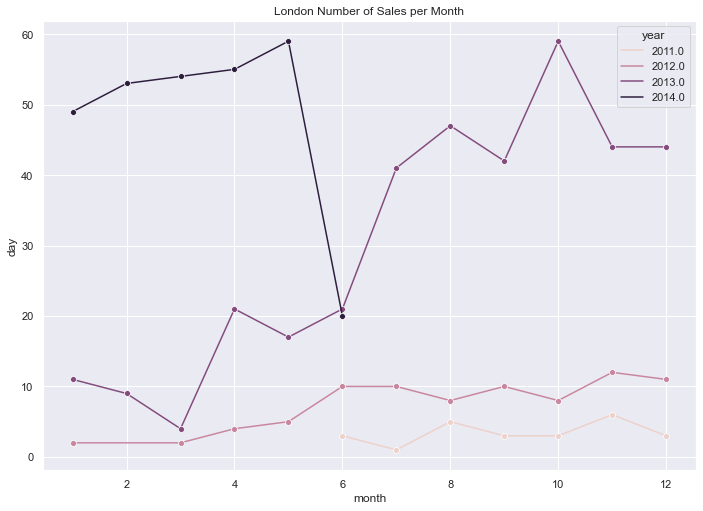

In [30]:
sns.lineplot(
    data = csd_df[csd_df['city'] == 'London'].groupby(['year', 'month']).count(),
    x = 'month',
    y = 'day',
    hue = 'year',
    ci = None,
    marker = 'o'
).set_title('London Number of Sales per Month')

Text(0.5, 1.0, 'Paris Number of Sales per Month')

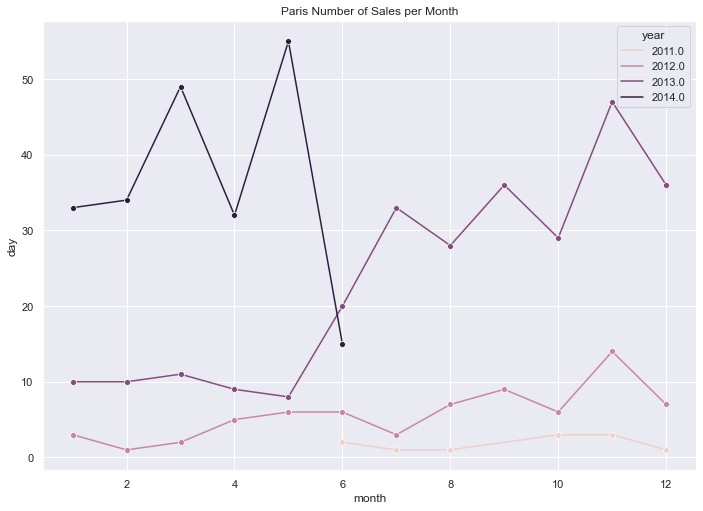

In [31]:
sns.lineplot(
    data = csd_df[csd_df['city'] == 'Paris'].groupby(['year', 'month']).count(),
    x = 'month',
    y = 'day',
    hue = 'year',
    ci = None,
    marker = 'o'
).set_title('Paris Number of Sales per Month')

### Step 3: Findings

Given the data, it seems that London is the most important city to the company. This is because London ranks high in total sales, and has shown a steady increase in the number of orders per month. Also, London ranks highest in both unique item and unique item subcategory purchasing. 

While the average sale amount for London may be low, the frequency of the orders makes up for the low average sale amount. Because the frequency of orders has been high in more recent months, London can be considered a steady source of income for future months.